In [1]:
import numpy as np
import datetime

## Tournament Schedule

Total matches= 64

1. Group Stage- 8 groups of 4 teams each<br>
    Each team plays 3 matches with the other teams in the group<br>
    Total matches per group= 6 (4C2)<br>
    Total matches= 48<br>

Knockout Stages- Played after Group Stages
1. Round of 16- 8 Matches (16C2 Matches)<br>
    First-place Group A vs. Second-place Group B- W1<br>
    First-place Group B vs. Second-place Group A- W2<br>
    First-place Group C vs. Second-place Group D- W3<br>
    First-place Group D vs. Second-place Group C- W4<br>
    First-place Group E vs. Second-place Group F- W5<br>
    First-place Group F vs. Second-place Group E- W6<br>
    First-place Group G vs. Second-place Group H- W7<br>
    First-place Group H vs. Second-place Group G- W8<br>

2. Quarter Finals- 4 Matches (8C2)<br>
    W1 vs W2- QF_W1<br>
    W3 vs W4- QF_W2<br>
    W5 vs W6- QF_W3<br>
    W7 vs W8- QF_W4<br>

3. Semi Finals- 2 Matches (4C2)<br>
    QF_W1 vs QF_W2- SF_W1<br>
    QF_W3 vs QF_W4- SF_W2<br>

4. Play-offs/ Third Place- 1 Match (2C2)<br> 
    Semi Final Losers<br>

5. Final- 1 Match<br>
    SF_W1 vs SF_W2<br>


In [2]:
#FIFA 2022 Groups

Groups= [
    ['Qatar', 'Ecuador', 'Senegal', 'Netherlands'],
    ['England', 'Iran', 'USA', 'Wales'],
    ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'],
    ['France', 'Australia', 'Denmark', 'Tunisia'],
    ['Spain', 'Costa Rica', 'Germany', 'Japan'],
    ['Belgium', 'Canada', 'Morocco', 'Croatia'],
    ['Brazil', 'Serbia', 'Switzerland', 'Cameroon'],
    ['Portugal', 'Ghana', 'Uruguay', 'South Korea']
]

In [3]:
def predictWinner(team1, team2, dateOfMatch):
    win_prob= np.random.random(1)
    winner= team1 if win_prob>0.5 else team2
    print(f"{team1} v/s {team2} on {dateOfMatch}- {winner} won")
    return winner, win_prob

In [17]:
def playGroupStage(start_date, labels, odds):
    num_grps= 8
    grp_winners= []
    print('Group Stage:')
    for grp in range(num_grps):
        teams= Groups[grp]
        winners= []
        for i in range(0,len(teams)):
            for j in range(i+1,len(teams)):
                dateOfMatch= start_date + datetime.timedelta(days=i*j)
                winner, win_prob= predictWinner(teams[i], teams[j], dateOfMatch)
                winners.append(winner)
                # labels.append(f"{teams[i]}({1/win_prob}) vs. {teams[j]}({1/(1-win_prob)})")
                # odds.append([win_prob, 1-win_prob])
        u, count = np.unique(winners, return_counts=True)
        count_sort_ind = np.argsort(-count)
        grp_winners.append(u[count_sort_ind][:2])

    return np.array(grp_winners), labels, odds

In [39]:
def play(previousWinners, stage= 'round_of_16', start_date= datetime.date(2023,1,10), labels= [], odds= []):
    winners= []
    i=0
    print(f"\nStage: {stage}")
    while i<len(previousWinners):
        if stage=='round_of_16':
            opp= i+1 if i%2!=0 else i+3
        else:
            opp= i+1
        dateOfMatch= start_date + datetime.timedelta(days=i)
        winner, win_prob= predictWinner(previousWinners[i], previousWinners[opp], dateOfMatch)
        winners.append(winner)
        labels.append(f"{previousWinners[i]}({np.round(1/win_prob,2)}) vs. {previousWinners[opp]}({np.round(1/(1-win_prob),2)})")
        odds.append([win_prob, 1-win_prob])
        if stage=='round_of_16':
            i+= 1 if i%2==0 else 3
        else:
            i+=2
    print(f'\n{stage} winners: {winners}')
    return winners, dateOfMatch, labels, odds


In [40]:
def playKnockOuts():
    labels = list()
    odds = list()
    groupStage, labels, odds= playGroupStage(start_date=datetime.date(2022,11,7), labels=labels, odds=odds)
    winners= groupStage.flatten()
    print(groupStage)
    stages = ['round_of_16', 'quarter_final', 'semi_final', 'final']
    last_date= datetime.date(2023,1,7)
    for stage in stages:
        winners, last_date, labels, odds= play(winners, stage= stage, start_date= last_date+ datetime.timedelta(days=3), labels=labels, odds=odds)
    return winners, labels, odds


winner, labels, odds= playKnockOuts()
print(winner)
print(labels)
print(odds)

Group Stage:
Qatar v/s Ecuador on 2022-11-07- Qatar won
Qatar v/s Senegal on 2022-11-07- Senegal won
Qatar v/s Netherlands on 2022-11-07- Netherlands won
Ecuador v/s Senegal on 2022-11-09- Ecuador won
Ecuador v/s Netherlands on 2022-11-10- Netherlands won
Senegal v/s Netherlands on 2022-11-13- Netherlands won
England v/s Iran on 2022-11-07- England won
England v/s USA on 2022-11-07- England won
England v/s Wales on 2022-11-07- England won
Iran v/s USA on 2022-11-09- Iran won
Iran v/s Wales on 2022-11-10- Wales won
USA v/s Wales on 2022-11-13- USA won
Argentina v/s Saudi Arabia on 2022-11-07- Argentina won
Argentina v/s Mexico on 2022-11-07- Mexico won
Argentina v/s Poland on 2022-11-07- Poland won
Saudi Arabia v/s Mexico on 2022-11-09- Mexico won
Saudi Arabia v/s Poland on 2022-11-10- Saudi Arabia won
Mexico v/s Poland on 2022-11-13- Poland won
France v/s Australia on 2022-11-07- France won
France v/s Denmark on 2022-11-07- Denmark won
France v/s Tunisia on 2022-11-07- Tunisia won
Aust

/var/folders/kp/g06z1mb155gd8pyl3xcg6tw80000gn/T/ipykernel_76704/1628945893.py:10: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog='twopi')


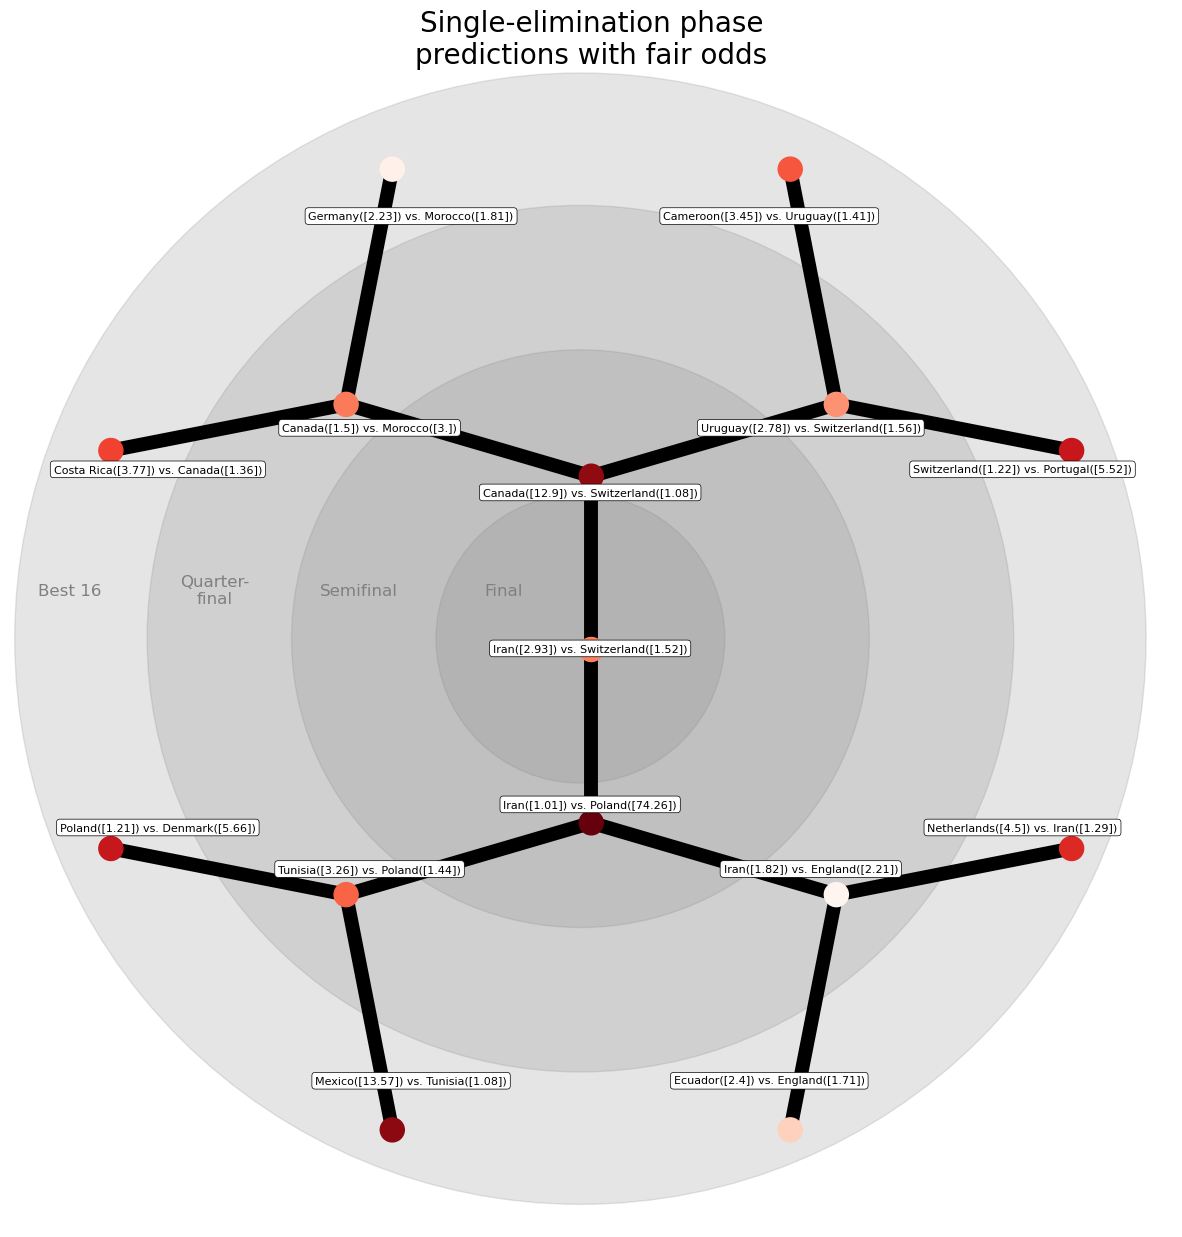

In [48]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import pandas as pd
from matplotlib import pyplot as plt

node_sizes = pd.DataFrame(list(reversed(odds)))
scale_factor = 0.3 # for visualization
G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='twopi')
centre = pd.DataFrame(pos).mean(axis=1).mean()

plt.figure(figsize=(15, 15))
ax = plt.subplot(1,1,1)
# add circles 
circle_positions = [(235, 'black'), (180, 'blue'), (120, 'red'), (60, 'yellow')]
[ax.add_artist(plt.Circle((centre, centre), 
                          cp, color='grey', 
                          alpha=0.2)) for cp, c in circle_positions]

# draw first the graph
nx.draw(G, pos, 
        node_color=node_sizes.diff(axis=1)[1].abs().pow(scale_factor), 
        # node_size=node_sizes.diff(axis=1)[1].abs().pow(scale_factor)*2000, 
        alpha=1, 
        cmap='Reds',
        edge_color='black',
        width=10,
        with_labels=False)

# draw the custom node labels
shifted_pos = {k:[(v[0]-centre)*0.9+centre,(v[1]-centre)*0.9+centre] for k,v in pos.items()}
nx.draw_networkx_labels(G, 
                        pos=shifted_pos, 
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=.5, alpha=1),
                        labels=dict(zip(reversed(range(len(labels))), labels)), font_size=8)

texts = ((10, 'Best 16', 'black'), (70, 'Quarter-\nfinal', 'blue'), (130, 'Semifinal', 'red'), (190, 'Final', 'yellow'))
[plt.text(p, centre+20, t, 
          fontsize=12, color='grey', 
          va='center', ha='center') for p,t,c in texts]
plt.axis('equal')
plt.title('Single-elimination phase\npredictions with fair odds', fontsize=20)
plt.show()

In [11]:
G = nx.petersen_graph()
pos = nx.nx_agraph.graphviz_layout(G)
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")